In [1]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score

In [8]:
# 加载数据集
file_path_college = r'F:\机械学习\实验4\College.csv'
college_data = pd.read_csv(file_path_college, index_col=0)

# 显示数据集的前几行以了解其结构
college_data.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [9]:
college_data.shape

(777, 18)

In [10]:
college_data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [11]:
college_data.isnull().sum().sum()

0

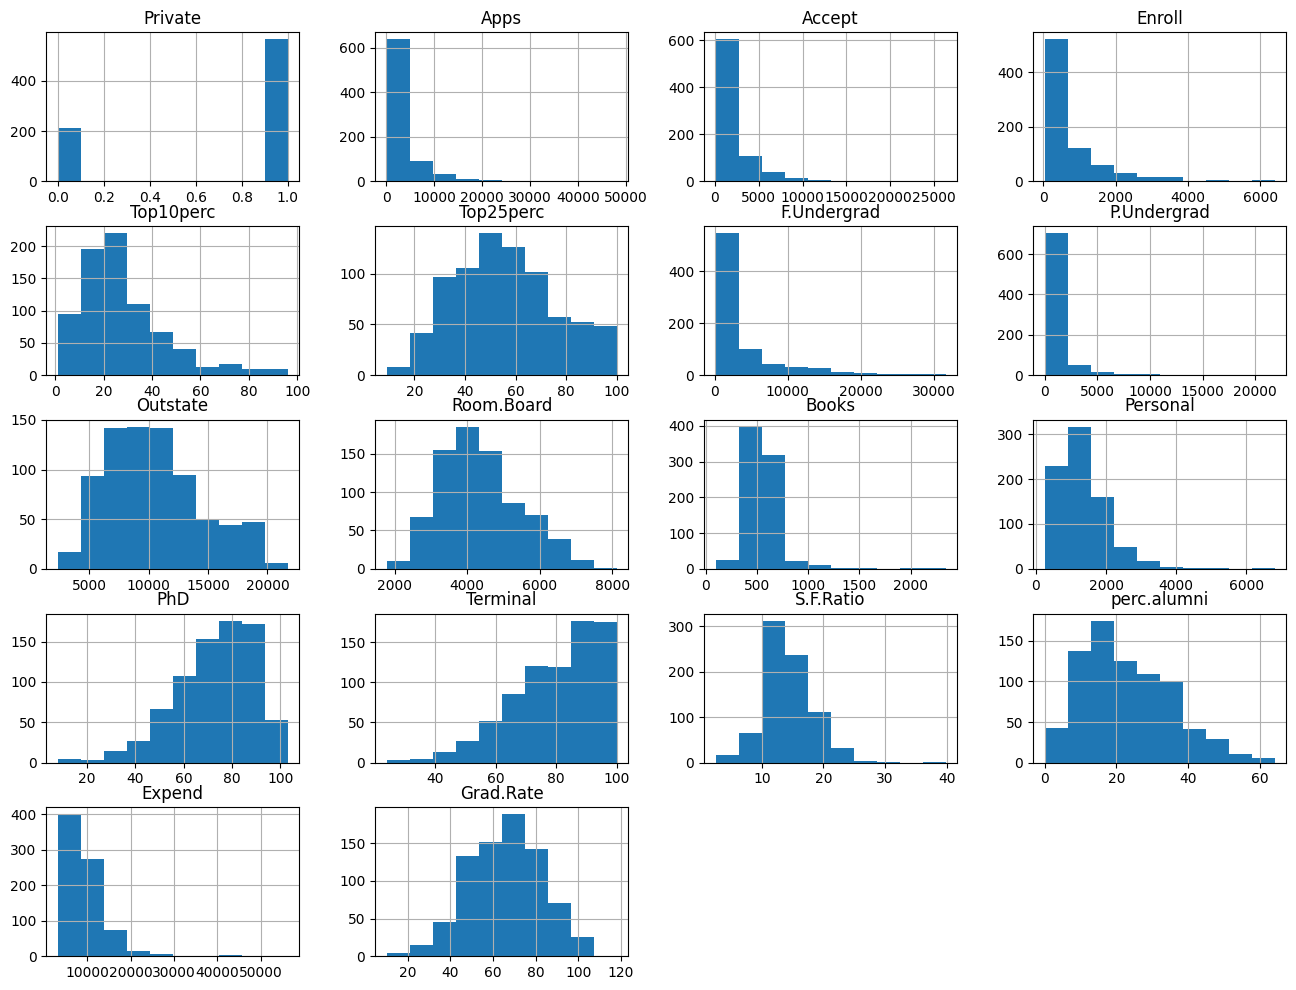

In [17]:
# 数据可视化
college_data.hist(figsize=(16,12))
plt.show()

In [13]:
# 预处理数据
# 离散变量转换为编码
print(college_data.Private[:5],'\n\n')
private_tmp = [1 if x== 'Yes' else 0 for x in college_data.Private]
college_data.Private = private_tmp
print(college_data.Private[:5]) 
# 建立第二份数据集，去掉离散变量
college_data_2 = college_data.drop("Private", axis=1)

Abilene Christian University    Yes
Adelphi University              Yes
Adrian College                  Yes
Agnes Scott College             Yes
Alaska Pacific University       Yes
Name: Private, dtype: object 


Abilene Christian University    1
Adelphi University              1
Adrian College                  1
Agnes Scott College             1
Alaska Pacific University       1
Name: Private, dtype: int64


In [14]:
# 建立聚类模型并查看聚类中心点
model_not_drop = KMeans(n_clusters=3)
model_drop = KMeans(n_clusters=3)
model_not_drop.fit(college_data)
model_drop.fit(college_data_2)

c:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

KMeans(n_clusters=3)

In [15]:
pd.DataFrame(model_not_drop.cluster_centers_, columns=college_data.columns)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.761062,1701.823009,1236.534513,491.520354,21.819469,49.776991,2226.180531,656.030088,9281.939823,4143.706195,537.015929,1329.796460,67.578761,75.143363,14.636283,20.927434,7830.746903,62.807080
1,0.084337,10621.614458,7300.638554,2939.421687,32.000000,63.469880,15482.506024,3174.554217,8235.855422,4134.879518,594.349398,1888.337349,84.156627,89.554217,16.407229,15.807229,9440.951807,60.506024
2,0.992248,3791.852713,2046.635659,653.937984,49.837209,77.224806,2573.550388,235.829457,16934.325581,5437.279070,574.604651,1035.751938,87.519380,93.333333,10.204651,35.162791,17813.813953,80.286822


In [16]:
pd.DataFrame(model_drop.cluster_centers_, columns=college_data_2.columns)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1701.823009,1236.534513,491.520354,21.819469,49.776991,2226.180531,656.030088,9281.939823,4143.706195,537.015929,1329.796460,67.578761,75.143363,14.636283,20.927434,7830.746903,62.807080
1,3791.852713,2046.635659,653.937984,49.837209,77.224806,2573.550388,235.829457,16934.325581,5437.279070,574.604651,1035.751938,87.519380,93.333333,10.204651,35.162791,17813.813953,80.286822
2,10621.614458,7300.638554,2939.421687,32.000000,63.469880,15482.506024,3174.554217,8235.855422,4134.879518,594.349398,1888.337349,84.156627,89.554217,16.407229,15.807229,9440.951807,60.506024
